
# Linear Regression with Python


The data contains the following columns:

* 'mean_of_area_income': Avg. Income of residents of the city house is located in.
* 'mean_of_area_house_age': Avg Age of Houses in same city
* 'mean_area_number_of_rooms': Avg Number of Rooms for Houses in same city
* 'mean_area_number_of_bedrooms': Avg Number of Bedrooms for Houses in same city
* 'population': Population of city house is located in
* 'selling_price': Price that the house sold at
* 'Adress': Address for the house

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

[## 3 Ways to Load CSV files into Colab:](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

1) From Github (Files < 25MB)


In [41]:
#url = 'copied_raw_GH_link'
#df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

url = 'https://raw.githubusercontent.com/GePajarinen/Machine-Learning-with-Python/main/MACHINE_LEARNING/LINEAR_REGRESSION/predict_house_price.csv'
df = pd.read_csv(url)

In [14]:
df.head()

,mean_of_area_income,mean_of_area_house_age,mean_area_number_of_rooms,mean_area_number_of_bedrooms,population,selling_price,Adress
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mean_of_area_income           5000 non-null   float64
 1   mean_of_area_house_age        5000 non-null   float64
 2   mean_area_number_of_rooms     5000 non-null   float64
 3   mean_area_number_of_bedrooms  5000 non-null   float64
 4   population                    5000 non-null   float64
 5   selling_price                 5000 non-null   float64
 6   Adress                        5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [16]:
df.describe()

,mean_of_area_income,mean_of_area_house_age,mean_area_number_of_rooms,mean_area_number_of_bedrooms,population,selling_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [17]:
df.columns

Index(['mean_of_area_income', 'mean_of_area_house_age',
       'mean_area_number_of_rooms', 'mean_area_number_of_bedrooms',
       'population', 'selling_price', 'Adress'],
      dtype='object')

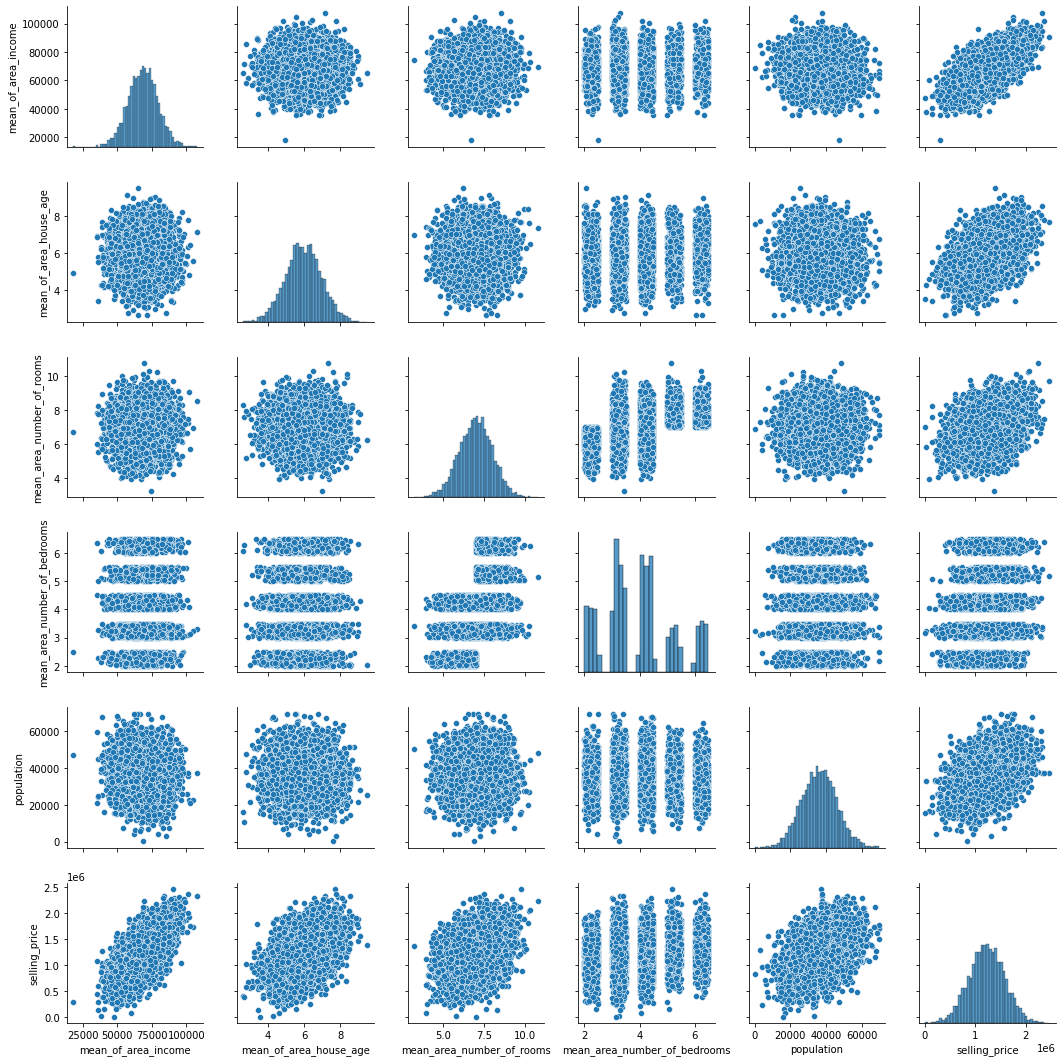

In [18]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


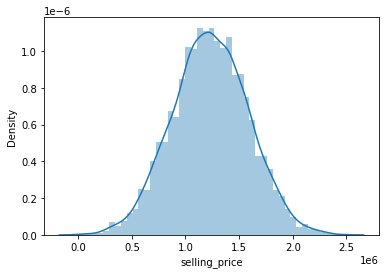

In [21]:
sns.distplot(df["selling_price"])

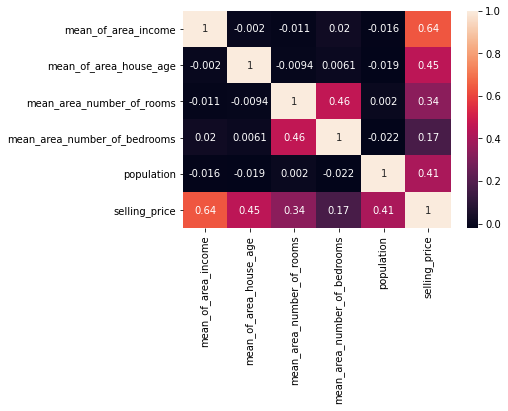

In [22]:
sns.heatmap(df.corr(), annot = True)

In [23]:
X = df[['mean_of_area_income', 'mean_of_area_house_age',
       'mean_area_number_of_rooms', 'mean_area_number_of_bedrooms',
       'population']]

In [24]:
X = df.drop(["Adress","selling_price"], axis = 1)

In [25]:
y = df ["selling_price"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

Podia olhar mais sobre o porquê dessas variáveis de tamanho e random.


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lm.intercept_)

-2640159.796852695


In [32]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [33]:
X_train.columns

Index(['mean_of_area_income', 'mean_of_area_house_age',
       'mean_area_number_of_rooms', 'mean_area_number_of_bedrooms',
       'population'],
      dtype='object')

In [34]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coeff"])

In [35]:
cdf

,Coeff
mean_of_area_income,21.528276
mean_of_area_house_age,164883.282027
mean_area_number_of_rooms,122368.678027
mean_area_number_of_bedrooms,2233.801864
population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **mean_of_area_income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **mean_of_area_house_age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **mean_area_number_of_rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **mean_area_number_of_bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **population** is associated with an **increase of \$15.15 **.



In [36]:
from sklearn.datasets import load_boston

In [37]:
boston = load_boston()

In [38]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [39]:
print(boston["data"])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [40]:
print(boston["target"])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):
